# 页面APP： 选择特征变量，并绘制Violin Plots

导入工具包

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import *
import warnings
warnings.filterwarnings('ignore')

### 步骤思路
- 输入数据文件名称
- 通过Checkbox选择需要画图的特征名，并定义绘图的标题和比较量名称，并保存在“Plots”文件夹中。
- 定义所需要的函数：将数据转化成Violin绘图可接受的格式。

#### 定义函数： 
- 转换原来数据格式为 {'Value', 'Categories'} 两列的数据

In [3]:
#convert raw dataframe into tow-columns dataframe of {'value':[], 'categorical':[]}
def change(data):
    new_df = pd.DataFrame()
    ar = np.array(data.transpose())
    ls = []
    cate = []
    for i in range(len(ar)):
        ls += list(ar[i])
    for j in data.columns:
        cate+=([j]* data.shape[0])
    new_df['value']=ls
    new_df['categorical']=cate
    return new_df

#only apply on the given feature names
def generate(columns):
    df = data[columns]
    new_df = change(df)
    return new_df

- 使用的画图工具

In [4]:
def Plot():
    #a list of selected values
    global List
    List = []
    for item in varList:
        if item.get() != "":
            List.append(item.get())
    print(List)
    #convert df
    df = generate(List)
    #extract string from the input
    t = title.get()
    n = name.get()
    
    #Violin Plotting
    plt.figure(figsize= (10,8))
    sns.set(style="whitegrid")
    sns.violinplot(y="value", 
                   x="categorical", 
                   data = df,
                   showmedians=True, 
                   palette="Blues")
    if liml.get()!=0 and limr.get()!=0:
        plt.ylim(liml.get(), limr.get())
    plt.ylabel(n, size = 14)
    plt.title(t, size = 16)
    
    #Save into the "Plots" folder
    plt.savefig(f'Plots/{t}.png')
    plt.show()

- 根据文件的所有特征名称，显示相应的Checkbox页面

In [5]:
# set up a loop
class Check:
    x = 6
    def __init__(self, lbl):
        self.var = StringVar()
        self.cb = Checkbutton(violin, text=lbl, variable=self.var,
                              onvalue=lbl, offvalue="")
        self.cb.grid(row=Check.x, column=1, sticky=W)
        Check.x += 1
        varList.append(self.var)

## Violin画图APP使用窗口：
##### 数据文件： 以“Dove1.csv"数据集为例
- 输入所需要使用的数据文件名称【需以csv格式储存在“Data”文件夹中】，特征数据以每列的形式展示，如图：
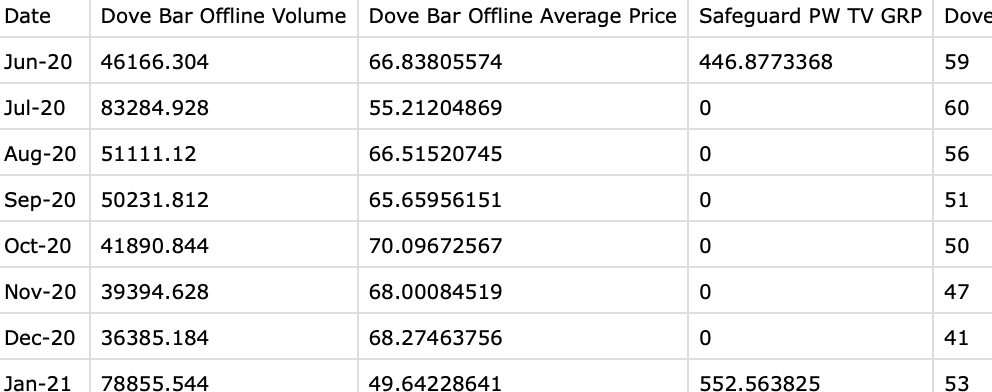

### Violin画图APP使用窗口：

使用数据文件名称：
- 可在脚本中进行更改

App窗口输入
- 输入绘图名称：Title
- 输入Y轴名称： Y label
- Y轴显示范围： 当使用默认范围时，请输入0

In [6]:
"""
使用的文件名称，可自定更改
"""
# filename = input()
filename = 'Dove1'
data = pd.read_csv(f'Data/{filename}.csv',index_col = 'Date')


"""
APP 窗口
"""
#global variables    
List = []
varList = []
violin = Tk()
violin.columnconfigure(0, weight=1, minsize=75)
violin.rowconfigure(0, weight=1, minsize=50)
violin.title("Violin Plot")

#input box
title = StringVar()
Label(violin, text="输入绘图名称:").grid(row=0)  #label
Entry(violin, textvariable = title).grid(row=0, column=1) #entry textbox
#input box
name = StringVar()
Label(violin, text="输入Y轴名称:").grid(row=1)  #label
Entry(violin, textvariable = name).grid(row=1, column=1) #entry textbox
#input limitation
liml = IntVar()

Label(violin, text='Y轴显示范围(请输入数字)').grid(row=2, column = 1)
Label(violin, text='从').grid(row=3, column = 0, sticky=E)
Entry(violin, textvariable = liml).grid(row=3, column=1) #entry textbox

limr = IntVar()
Label(violin, text='至').grid(row=4,column = 0, sticky=E)
Entry(violin, textvariable = limr).grid(row=4, column=1) #entry textbox


#button 
b1 = Button(violin, text = "PLOT", command = Plot)
b1.grid(row=4, column=5, sticky = W)

#display available features list
for i in data.columns:
    Check(i)


#可一直循环使用，无需关闭窗口   
mainloop()